In [70]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [72]:
df=pd.read_csv(r'C:\Users\Tony\Downloads\daily_dataset\summary\daily_dataset_summary.csv')

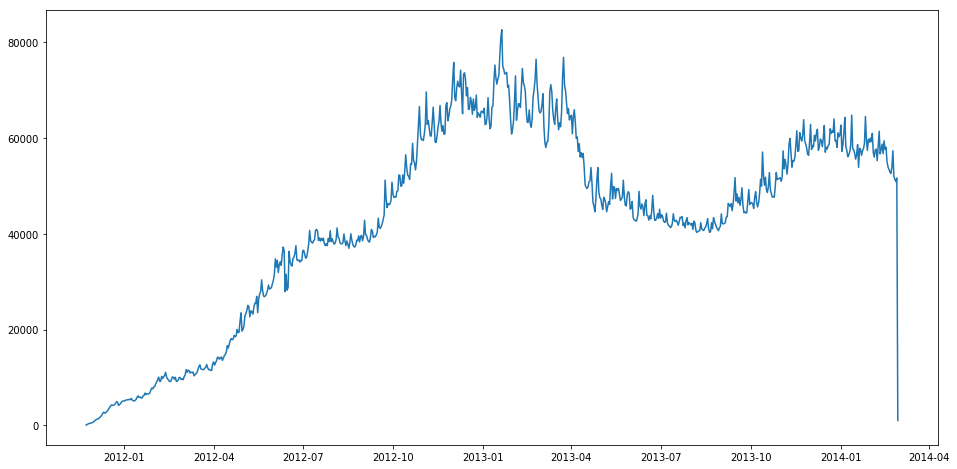

In [73]:
#setting index as date
df['day'] = pd.to_datetime(df.day,format='%Y-%m-%d')
df.index = df['day']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['total_consumption'], label='total_consumption')

In [74]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['day', 'total_consumption'])

for i in range(0,len(data)):
    new_data['day'][i] = data['day'][i]
    new_data['total_consumption'][i] = data['total_consumption'][i]

In [75]:
new_data.index = new_data.day
new_data.drop('day', axis=1, inplace=True)

In [76]:
dataset = new_data.values

In [77]:
train = dataset[0:600,:]
valid = dataset[600:,:]


In [97]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(dataset)
scaled_data = scaler.fit_transform(train)

In [111]:
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [112]:
x_train

array([[0.        , 0.00149015, 0.0025873 , ..., 0.0495507 , 0.05025994,
        0.05153428],
       [0.00149015, 0.0025873 , 0.00400425, ..., 0.05025994, 0.05153428,
        0.05501448],
       [0.0025873 , 0.00400425, 0.00429382, ..., 0.05153428, 0.05501448,
        0.05872455],
       ...,
       [0.55927177, 0.55172925, 0.52965905, ..., 0.50504586, 0.50389983,
        0.49927073],
       [0.55172925, 0.52965905, 0.55831898, ..., 0.50389983, 0.49927073,
        0.50169567],
       [0.52965905, 0.55831898, 0.56965769, ..., 0.49927073, 0.50169567,
        0.50986185]])

In [113]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [114]:
x_train.shape

(570, 30, 1)

In [115]:
# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(units=240, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(.2))
# model.add(LSTM(units=120,return_sequences=True))
# model.add(Dropout(.2))
# model.add(LSTM(units=50))
# model.add(Dropout(.2))

# model.add(Dense(1))


In [116]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10))
model.add(Dense(1))


In [117]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=2)


Epoch 1/50
 - 11s - loss: 0.1661
Epoch 2/50
 - 2s - loss: 0.0090
Epoch 3/50
 - 1s - loss: 0.0034
Epoch 4/50
 - 1s - loss: 0.0029
Epoch 5/50
 - 1s - loss: 0.0026
Epoch 6/50
 - 1s - loss: 0.0024
Epoch 7/50
 - 1s - loss: 0.0022
Epoch 8/50
 - 1s - loss: 0.0023
Epoch 9/50
 - 1s - loss: 0.0022
Epoch 10/50
 - 1s - loss: 0.0021
Epoch 11/50
 - 1s - loss: 0.0022
Epoch 12/50
 - 1s - loss: 0.0019
Epoch 13/50
 - 1s - loss: 0.0019
Epoch 14/50
 - 1s - loss: 0.0019
Epoch 15/50
 - 1s - loss: 0.0018
Epoch 16/50
 - 1s - loss: 0.0019
Epoch 17/50
 - 1s - loss: 0.0018
Epoch 18/50
 - 1s - loss: 0.0017
Epoch 19/50
 - 1s - loss: 0.0017
Epoch 20/50
 - 1s - loss: 0.0016
Epoch 21/50
 - 1s - loss: 0.0017
Epoch 22/50
 - 1s - loss: 0.0015
Epoch 23/50
 - 1s - loss: 0.0015
Epoch 24/50
 - 1s - loss: 0.0015
Epoch 25/50
 - 1s - loss: 0.0016
Epoch 26/50
 - 1s - loss: 0.0015
Epoch 27/50
 - 1s - loss: 0.0015
Epoch 28/50
 - 1s - loss: 0.0015
Epoch 29/50
 - 1s - loss: 0.0017
Epoch 30/50
 - 1s - loss: 0.0015
Epoch 31/50
 - 1s 

In [87]:

inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [88]:
inputs.shape[0]

259

In [89]:
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
    

X_test = np.array(X_test)



In [90]:
X_test

array([[0.55831898, 0.56965769, 0.53066935, ..., 0.50169567, 0.50986185,
        0.53456172],
       [0.56965769, 0.53066935, 0.52948392, ..., 0.50986185, 0.53456172,
        0.5175248 ],
       [0.53066935, 0.52948392, 0.51832449, ..., 0.53456172, 0.5175248 ,
        0.51494627],
       ...,
       [0.7204234 , 0.69476298, 0.72287392, ..., 0.69390303, 0.62868332,
        0.62176667],
       [0.69476298, 0.72287392, 0.71549841, ..., 0.62868332, 0.62176667,
        0.61595028],
       [0.72287392, 0.71549841, 0.72580738, ..., 0.62176667, 0.61595028,
        0.62485143]])

In [91]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
energySum = model.predict(X_test)
energySum = scaler.inverse_transform(energySum)

In [92]:
# energySum = model.predict(X_test)
# energySum = scaler.inverse_transform(energySum)

In [93]:
# rms=np.sqrt(np.mean(np.power((valid-energySum),2)))

In [94]:
# rms

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Time')

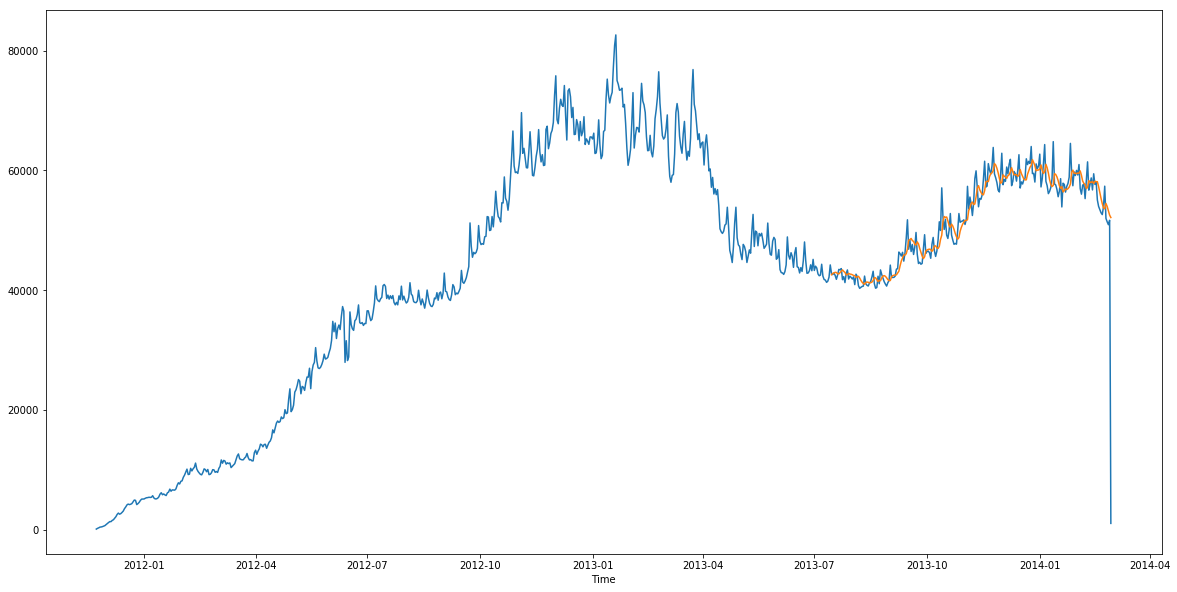

In [95]:
train = new_data[:600]
valid = new_data[600:]
valid['Predictions'] = energySum
#plt.plot(train['total_consumption'])
#plt.plot(valid[['total_consumption','Predictions']])
plt.plot(new_data['total_consumption'])
plt.plot(valid[['Predictions']])
plt.xlabel("Time")